<a href="https://colab.research.google.com/github/rh2098ta/Practicalapplication1/blob/main/practicalassignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
coupons = pd.read_csv('coupons.csv')
coupons.info()
coupons.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [12]:
coupons.drop(columns=['car'], inplace=True)
cols_to_fill = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
coupons[cols_to_fill] = coupons[cols_to_fill].fillna('never')


In [14]:
mid = coupons[coupons['coupon'] == 'Restaurant(20-50)']


In [15]:
accept_rate = mid['Y'].mean()
print(f'Overall acceptance rate: {accept_rate:.1%}')


Overall acceptance rate: 44.1%


In [16]:
for col in mid.select_dtypes('object').columns:
    rates = mid.groupby(col)['Y'].mean().sort_values(ascending=False)
    print(f'\n{col}\n{rates}')



destination
destination
No Urgent Place    0.502439
Home               0.430322
Work               0.398601
Name: Y, dtype: float64

passanger
passanger
Partner      0.631206
Friend(s)    0.464286
Alone        0.422200
Kid(s)       0.373563
Name: Y, dtype: float64

weather
weather
Sunny    0.464314
Rainy    0.384615
Snowy    0.300000
Name: Y, dtype: float64

time
time
10AM    0.616071
2PM     0.538462
6PM     0.502577
7AM     0.398601
10PM    0.328084
Name: Y, dtype: float64

coupon
coupon
Restaurant(20-50)    0.441019
Name: Y, dtype: float64

expiration
expiration
1d    0.520921
2h    0.298507
Name: Y, dtype: float64

gender
gender
Male      0.455285
Female    0.427056
Name: Y, dtype: float64

age
age
26         0.496552
46         0.488095
36         0.469880
41         0.455224
21         0.439597
31         0.417021
below21    0.412698
50plus     0.355856
Name: Y, dtype: float64

maritalStatus
maritalStatus
Unmarried partner    0.489083
Single               0.462214
Married partne

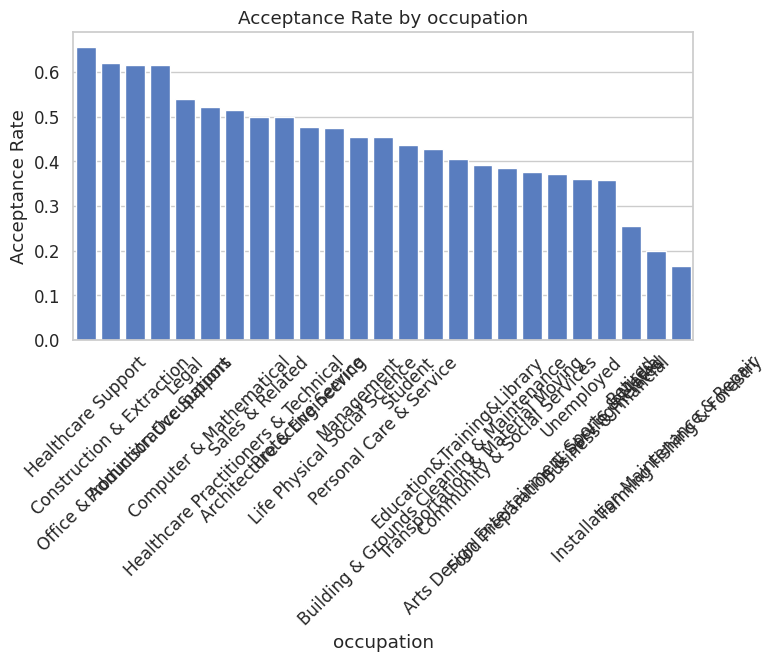

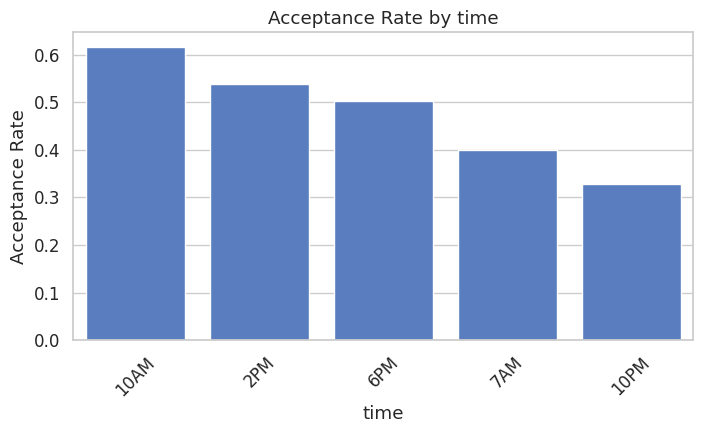

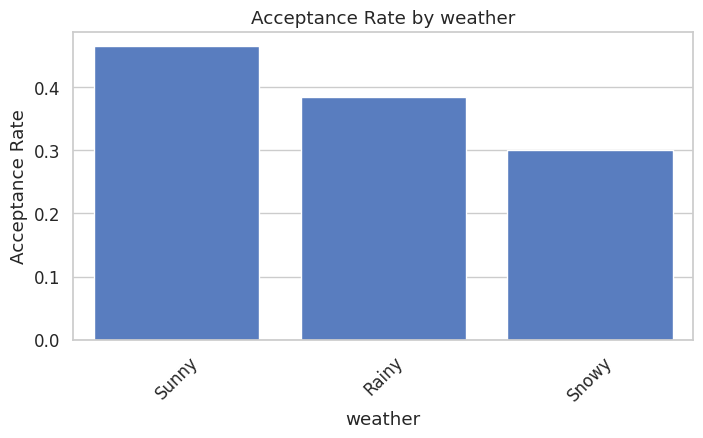

KeyError: 'passenger'

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid', palette='muted', font_scale=1.1)

def plot_acceptance(col):
    rates = mid.groupby(col)['Y'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    sns.barplot(x=rates.index, y=rates.values)
    plt.title(f'Acceptance Rate by {col}')
    plt.ylabel('Acceptance Rate')
    plt.xticks(rotation=45)
    plt.show()

for feature in ['occupation', 'time', 'weather', 'passenger', 'Restaurant20To50']:
    plot_acceptance(feature)


In [18]:
categorical_cols = mid.select_dtypes(include='object').columns
summary = []

for col in categorical_cols:
    rates = mid.groupby(col)['Y'].mean()
    for val, rate in rates.items():
        summary.append({'feature': col, 'category': val, 'accept_rate': rate})

summary_df = pd.DataFrame(summary)
summary_df.sort_values('accept_rate', ascending=False).head(10)


,feature,category,accept_rate
95,Restaurant20To50,gt8,0.687500
50,occupation,Healthcare Support,0.656250
6,passanger,Partner,0.631206
94,Restaurant20To50,4~8,0.626374
45,occupation,Construction & Extraction,0.619048
10,time,10AM,0.616071
57,occupation,Production Occupations,0.615385
55,occupation,Office & Administrative Support,0.615385
75,Bar,gt8,0.595238
37,education,Some High School,0.583333


In [19]:
filtered = mid[
    (mid['Restaurant20To50'].isin(['1~3', '4~8', 'gt8'])) &
    (mid['occupation'].isin(['Construction & Extraction',
                             'Healthcare Support',
                             'Office & Administrative Support',
                             'Production Occupations'])) &
    (mid['time'].isin(['10AM', '2PM', '6PM'])) &
    (mid['weather'] == 'Sunny') &
    (mid['temperature'] > 30) &
    (mid['expiration'] == '1d')
]

accept_filtered = filtered['Y'].mean()
accept_total = mid['Y'].mean()
len_filtered = len(filtered)
len_total = len(mid)

print(f"Filtered acceptance rate: {accept_filtered:.1%}")
print(f"Baseline acceptance rate: {accept_total:.1%}")
print(f"Filtered population: {len_filtered} of {len_total} ({len_filtered/len_total:.1%})")


Filtered acceptance rate: 82.4%
Baseline acceptance rate: 44.1%
Filtered population: 17 of 1492 (1.1%)


In [21]:
pd.DataFrame({
    'Scenario': ['Overall', 'Filtered (Targeted)'],
    'Acceptance Rate': [accept_total, accept_filtered],
    'Population Size': [len_total, len_filtered]
})


,Scenario,Acceptance Rate,Population Size
0,Overall,0.441019,1492
1,Filtered (Targeted),0.823529,17


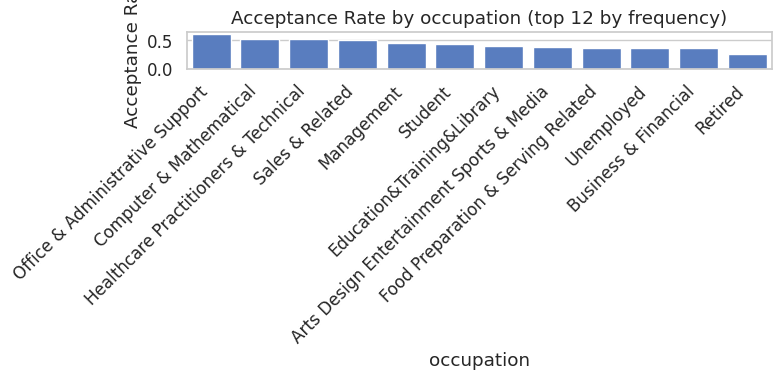

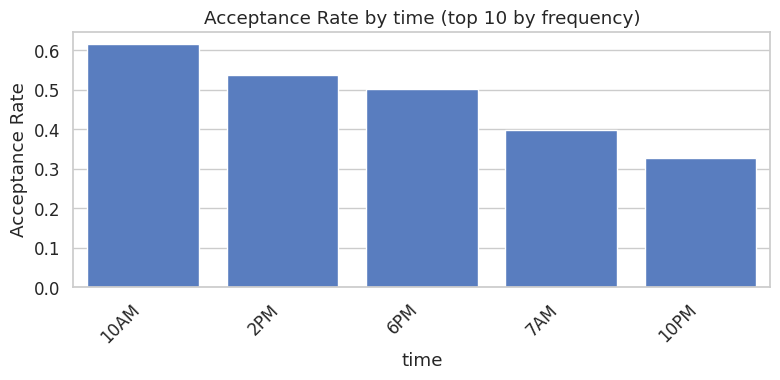

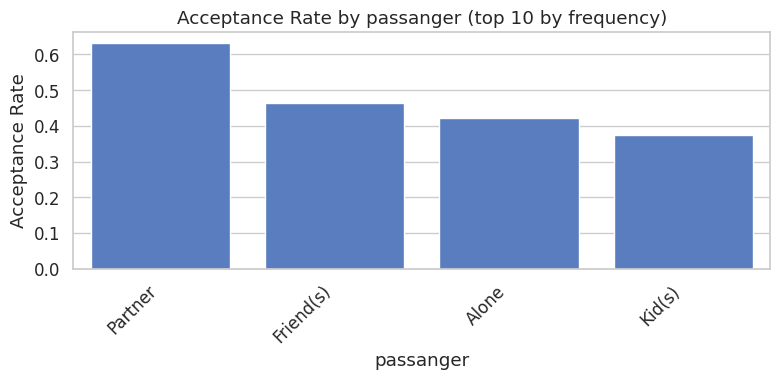

,accept_rate,n
passanger,,
Partner,0.631206,141
Friend(s),0.464286,168
Alone,0.422200,1009
Kid(s),0.373563,174


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ALIAS = {
    'passenger': 'passanger',
    'restaurant20to50': 'Restaurant20To50',
    'restaurant_20_50': 'Restaurant20To50',
    'temp': 'temperature',
}

def resolve_col(df, col):

    if col in df.columns:
        return col

    if col in ALIAS and ALIAS[col] in df.columns:
        return ALIAS[col]

    for c in df.columns:
        if c.lower() == col.lower():
            return c
    raise KeyError(f"Column '{col}' not found. Available: {list(df.columns)}")

def accepted_vs_rejected_bar(col, top_n=10):
    col = resolve_col(mid, col)
    tbl = (mid.groupby(col)['Y']
             .agg(['mean','count'])
             .rename(columns={'mean':'accept_rate','count':'n'}))


    tbl = (tbl.sort_values('n', ascending=False)
             .head(top_n)
             .sort_values('accept_rate', ascending=False))

    plt.figure(figsize=(8,4))
    sns.barplot(x=tbl.index, y=tbl['accept_rate'])
    plt.title(f'Acceptance Rate by {col} (top {top_n} by frequency)')
    plt.ylabel('Acceptance Rate')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    return tbl


accepted_vs_rejected_bar('occupation', top_n=12)
accepted_vs_rejected_bar('time', top_n=10)
accepted_vs_rejected_bar('passenger', top_n=10)


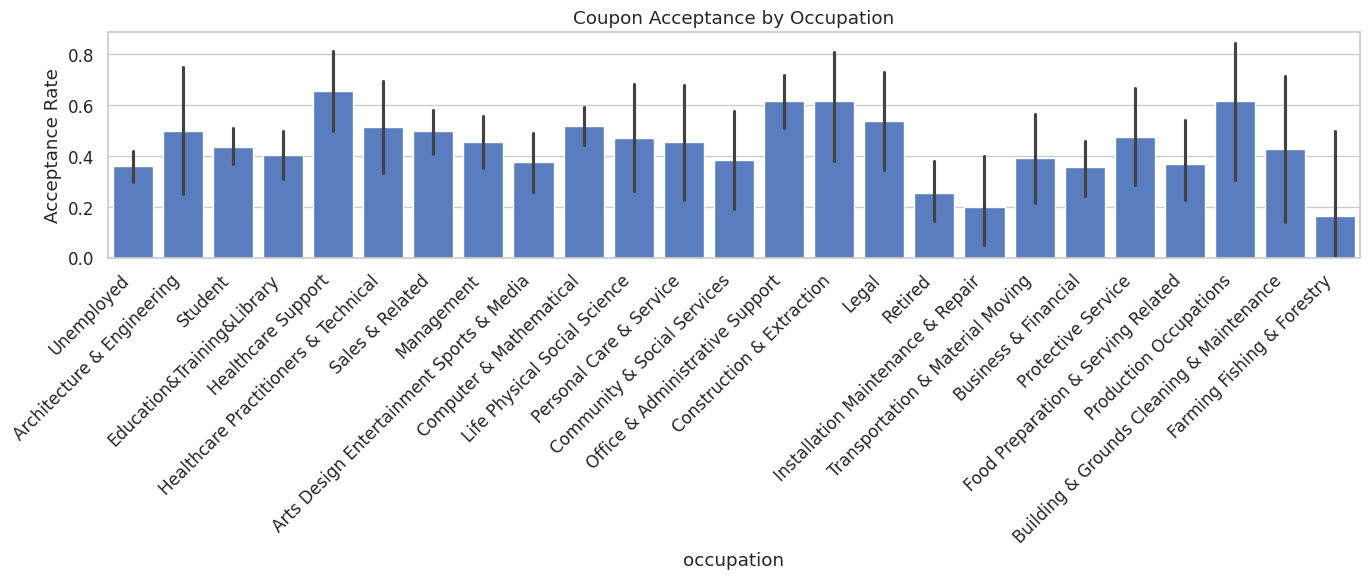

In [28]:
plt.figure(figsize=(14,6))
sns.barplot(x='occupation', y='Y', data=mid)
plt.title('Coupon Acceptance by Occupation')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
